In [130]:
import pandas as pd

In [131]:
cd script/

[Errno 2] No such file or directory: 'script/'
/Users/usuario/PycharmProjects/pythonProject5/UCEMA/06-examen/script


In [132]:
path_file = "..//fuentes/recibos_facts_debitos.csv"

In [133]:
df = pd.read_csv(path_file, index_col=0)

## 1- Cuáles son las características principales del DF?
a- Cantidad de rows y columnas.
b- Clases de datos


In [134]:
print(f" El dataframe es un excel con recibos cobrados. En el dataset hay {df.shape[0]} filas y {df.shape[1]}.los tipos de datos por columnas son {df.dtypes}")

 El dataframe es un excel con recibos cobrados. En el dataset hay 41334 filas y 4.los tipos de datos por columnas son Nro Comprobante     object
Fecha               object
Total              float64
ID_cliente         float64
dtype: object


## 2. El dataset cuenta con datos faltantes?
a- Muestre la cantidad de faltantes por columnas

In [135]:
df.isna().sum()

Nro Comprobante    0
Fecha              0
Total              3
ID_cliente         4
dtype: int64

b-Que porcentaje de faltantes hay

In [136]:
df.isna().sum()/len(df)

Nro Comprobante    0.000000
Fecha              0.000000
Total              0.000073
ID_cliente         0.000097
dtype: float64

c-Sí hay faltantes, cómo procederán a hacer el tratamiento de los mismos?

In [137]:
df[df.Total.isna()]

,Nro Comprobante,Fecha,Total,ID_cliente
41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,REC X0099-00006794,2014-09-04,NaN,NaN
41333,REC X0099-00006794,2022-09-04,NaN,NaN


In [138]:
df[df.ID_cliente.isna()]

,Nro Comprobante,Fecha,Total,ID_cliente
41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,REC X0099-00006794,2014-09-04,NaN,NaN
41333,REC X0099-00006794,2022-09-04,NaN,NaN
41334,REC X0099-00006794,2022-03-01,10000000.0,NaN


Se observa valores nulos en 3 muestras de total, todas se corresponden con valores nulos de ID de cliente. También hay un valor en ID_cliente nulo con un valor atípico en la columna Total

In [139]:
df.Fecha = pd.to_datetime(df.Fecha)

In [140]:
filtro = df.Fecha > "2014-09-04"
minimo_exceptuando_nulos = df[filtro]["Fecha"].min()
minimo_exceptuando_nulos

Timestamp('2015-12-10 00:00:00')

In [141]:
dias_diferencia = (df[filtro]["Fecha"].min() -  df["Fecha"].min()).days

In [142]:
total_de_la_muestra = len(df)
cant_casos_fecha_mayor = (df.Fecha > "2014-09-04").sum()
porcentaje_casos = cant_casos_fecha_mayor/total_de_la_muestra

print(f"En el caso de los nulos. Observamos que en el caso del Total dos casos tienen una fecha igual a 2014-09-04 y La fecha siguiente a esa fecha minima es {minimo_exceptuando_nulos} correspondiente a {minimo_exceptuando_nulos - df.Fecha.min()} días de diferencia. Siendo posiblemente un valor mal imputado. Teniendo en cuenta todos los nulos observamos que hay un total de {total_de_la_muestra}. Es decir {df.Total.isna().sum()} casos de total es nulo y {df.ID_cliente.isna().sum()} donde el ID de cliente es nulo. Entotal representan el {porcentaje_casos*100:.5f}  % del total del dataset. Observando los casos donde Total es nulo se puede analizar que es un valor atípico. Por lo tanto es una buena decisión eliminar valores nulos y no reemplazarlos")

En el caso de los nulos. Observamos que en el caso del Total dos casos tienen una fecha igual a 2014-09-04 y La fecha siguiente a esa fecha minima es 2015-12-10 00:00:00 correspondiente a 462 days 00:00:00 días de diferencia. Siendo posiblemente un valor mal imputado. Teniendo en cuenta todos los nulos observamos que hay un total de 41334. Es decir 3 casos de total es nulo y 4 donde el ID de cliente es nulo. Entotal representan el 99.99516  % del total del dataset. Observando los casos donde Total es nulo se puede analizar que es un valor atípico. Por lo tanto es una buena decisión eliminar valores nulos y no reemplazarlos


## 3.Imprima las estadísticas básicas del dataset.
Hay un método para eso tanto en python cómo en R (count, mean, 25%,etc)

In [143]:
df.describe().round()

,Total,ID_cliente
count,41331.0,41330.0
mean,1302.0,483.0
std,49200.0,275.0
min,0.0,0.0
25%,331.0,242.0
50%,999.0,476.0
75%,1000.0,733.0
max,10000000.0,964.0


In [144]:
maximo_original = df["Total"].max()
filtro = df.Total < 10000000.0
maximo_siguiente = df[filtro]["Total"].max()

In [145]:
(maximo_original - maximo_siguiente)/maximo_siguiente

177.57142857142858

## 4.¿Qué es un dato outlier? ¿Cómo procedería al análisis del mismo?
Un dato outliers es un dato que está fuera de la distribución de una variable. Muchas veces los valores outliers pueden ser datos mal imputados pero otras veces pueden aportar información importante sobre el caso. Por ejemplo en un caso de Fraude, los casos outliers pueden significar un patrón a analizar. En este dataset tenemos que el valor más cercano al valor máximo en el Valor Total a 10000000 es 56000 representando un 177% más respecto a este segundo valor.

In [146]:
df.nlargest(1, 'Total')

,Nro Comprobante,Fecha,Total,ID_cliente
41334,REC X0099-00006794,2022-03-01,10000000.0,NaN


In [147]:
df.nlargest(2, 'Total')

,Nro Comprobante,Fecha,Total,ID_cliente
41334,REC X0099-00006794,2022-03-01,10000000.0,NaN
33688,REC X0001-00004566,2020-06-30,56000.0,394.0


In [148]:
df.nlargest(3, 'Total')

,Nro Comprobante,Fecha,Total,ID_cliente
41334,REC X0099-00006794,2022-03-01,10000000.0,NaN
33688,REC X0001-00004566,2020-06-30,56000.0,394.0
33791,REC X0003-00000075,2020-07-31,53212.0,394.0


## 5. Cambie el nombre de las columnas a "nro_comprobante", "fecha","monto","id_cliente"

In [149]:
df.columns = ["nro_comprobante", "fecha","monto","id_cliente"]

## 6. ¿Cuantos clientes únicos hay en el dataset?

In [150]:
df.id_cliente.nunique()

965

## 7. Cree una nueva columna que llamada “tipo” que consista en agarrar la columna “nro_comprobante” y separar el primer string dejando sólo si es recibo, factura, nota de débito o nota de crédito.


In [151]:
df["tipo"] =df.nro_comprobante.apply(lambda x:x.split(" ")[0])

In [152]:
df.tipo.unique()

array(['FAC', 'N/C', 'N/D', 'REC'], dtype=object)

## 8. Tipos de Comprobante.Responda.
a- Cuantos registros se tienen de cada uno? (columna cantidad)
b -monto total de los recibos (Columna suma monto)
c- monto total de las notas de débito
d- monto total de las notas de crédito
e-monto total de lo facturado


In [153]:
df.groupby("tipo").agg(
    suma_monto =  ('monto', 'sum'),
    cantidad = ('monto', 'count')
)


,suma_monto,cantidad
tipo,,
FAC,7598706.46,10974
N/C,1335102.12,2387
N/D,8204046.41,15762
REC,36693028.63,12208


9. ¿Dé qué tipo de datos es la columna fecha? Pasarla a datetime
Era de tipo object o string.

In [154]:
#opcion1
df["year"] = pd.to_datetime(df.fecha).dt.year
df["month"] = pd.to_datetime(df.fecha).dt.month
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df['date']

0       2015-12-01
1       2015-12-01
2       2015-12-01
3       2015-12-01
4       2015-12-01
           ...    
41329   2018-09-01
41330   2014-09-01
41331   2014-09-01
41333   2022-09-01
41334   2022-03-01
Name: date, Length: 41334, dtype: datetime64[ns]

In [155]:
#opcion 2
df["year"] = pd.to_datetime(df.fecha).dt.year
df["month"] = pd.to_datetime(df.fecha).dt.month
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['year_month']

0        2015-12
1        2015-12
2        2015-12
3        2015-12
4        2015-12
          ...   
41329     2018-9
41330     2014-9
41331     2014-9
41333     2022-9
41334     2022-3
Name: year_month, Length: 41334, dtype: object

In [156]:
#opcion 3
pd.to_datetime(df["fecha"]).dt.to_period('M')

0        2015-12
1        2015-12
2        2015-12
3        2015-12
4        2015-12
          ...   
41329    2018-09
41330    2014-09
41331    2014-09
41333    2022-09
41334    2022-03
Name: fecha, Length: 41334, dtype: period[M]

## 11- Sumar sólo lo cobrado (REC y N/D)
 b- mostrar una tabla que tenga como indice fecha(año-mes) y columna monto_cobrado, cantidad_recibos. (group by)


In [157]:
filter_rec = (df["tipo"] == "REC") | (df["tipo"] == "N/D")
recibos_df = df[filter_rec]

In [158]:
#opcion 1
rec_mensual = recibos_df.groupby(["date"]).agg(
    suma_monto =  ('monto', 'sum'),
    cantidad = ('monto', 'count')
)
rec_mensual

,suma_monto,cantidad
date,,
2014-09-01,0.00,0
2015-12-01,3339.00,4
2016-01-01,23217.27,24
2016-02-01,87138.09,61
2016-03-01,193843.65,158
...,...,...
2022-03-01,10245495.68,210
2022-04-01,145510.59,148
2022-05-01,87518.58,106


In [159]:
#opcion 2
def recibo(x):
    if x == "REC":
        return 1
    else:
        return 0
recibos_df["REC"] = recibos_df["tipo"].apply(recibo)
recibos_df.head()

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/1287479126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recibos_df["REC"] = recibos_df["tipo"].apply(recibo)


,nro_comprobante,fecha,monto,id_cliente,tipo,year,month,date,year_month,REC
13361,N/D B0001-00000001,2016-01-12,66.16,536.0,N/D,2016,1,2016-01-01,2016-1,0
13362,N/D B0001-00000002,2016-01-28,110.54,838.0,N/D,2016,1,2016-01-01,2016-1,0
13363,N/D B0001-00000003,2016-02-05,16.46,536.0,N/D,2016,2,2016-02-01,2016-2,0
13364,N/D B0001-00000004,2016-02-11,83.10,838.0,N/D,2016,2,2016-02-01,2016-2,0
13365,N/D B0001-00000005,2016-02-16,49.99,801.0,N/D,2016,2,2016-02-01,2016-2,0


In [160]:
recibos_df["REC"].unique()

array([0, 1])

In [161]:
#opcion 2
rec_mensual = recibos_df.groupby(["date"]).agg(
    suma_monto =  ('monto', 'sum'),
    cantidad = ('REC', 'sum')
)
rec_mensual

,suma_monto,cantidad
date,,
2014-09-01,0.00,2
2015-12-01,3339.00,4
2016-01-01,23217.27,21
2016-02-01,87138.09,56
2016-03-01,193843.65,128
...,...,...
2022-03-01,10245495.68,14
2022-04-01,145510.59,10
2022-05-01,87518.58,7


In [162]:
#Opcion aburrida

In [163]:
df[df.tipo == "REC"]["monto"].sum()

36693028.629999995

In [164]:
df[df.tipo == "N/D"]["monto"].sum()

8204046.409999998

In [165]:
df[df.tipo == "FAC"]["monto"].sum()

7598706.459999999

## 12.¿Cuantos valores hay mayores a 60000 de la columna monto en el dataset general?


In [166]:
(df["monto"]>60000).sum()

1

## 13. ¿Cual es el valor máximo de la columna monto?  ¿Debería eliminarlo? ¿Por qué?  (en el dataset general)

In [167]:
df["monto"].max()

10000000.0

In [168]:
df.nlargest(3, 'monto')

,nro_comprobante,fecha,monto,id_cliente,tipo,year,month,date,year_month
41334,REC X0099-00006794,2022-03-01,10000000.0,NaN,REC,2022,3,2022-03-01,2022-3
33688,REC X0001-00004566,2020-06-30,56000.0,394.0,REC,2020,6,2020-06-01,2020-6
33791,REC X0003-00000075,2020-07-31,53212.0,394.0,REC,2020,7,2020-07-01,2020-7


Dado que tiene valores nulos en id_cliente y además representa un 177% más que el valor siguiente puedo justificar que es un valor mal imputado y por es lo eliminaría

## 14.No tenga en cuenta el valor máximo para los siguientes análisis.


In [169]:
df = df[df["monto"]<df["monto"].max()]

filter_rec = (df["tipo"] == "REC") | (df["tipo"] == "N/D")
recibos_df = df[filter_rec]
recibos_df["REC"] = recibos_df["tipo"].apply(recibo)
rec_mensual = recibos_df.groupby(["date"]).agg(
    suma_monto =  ('monto', 'sum'),
    cantidad = ('REC', 'sum'),
    clientes_unicos = ('id_cliente', 'nunique')
)

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/3344998958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recibos_df["REC"] = recibos_df["tipo"].apply(recibo)


## 15. en el total del dataset.
Cuanto representa lo facturado sobre lo cobrado.
Si sabe que lo facturado es el IVA ¿Tiene sentido? ¿Cómo lo interpretas?


In [170]:
df[df.tipo == "FAC"]["monto"].sum()/(df[df.tipo == "REC"]["monto"].sum() + df[df.tipo == "N/D"]["monto"].sum())

0.2177462280517823

# 16. Dataset Dolar

Agregar dataset de dolar blue
* 1- Cuáles son las características principales del DF?
Cantidad de rows y columnas.
Clases de datos
* 2- El dataset cuenta con datos faltantes?
Muestre la cantidad de faltantes por columnas
Que porcentaje de faltantes hay
Muestre las filas con datos faltantes
Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?
Haga el tratamiento de los valores faltantes en caso de creerlo necesario.
* 3- Imprima las estadísticas básicas del dataset. Hay un método para eso tanto en python cómo en R (count, mean, 25%,etc)


In [171]:
dolar_df = pd.read_csv("../fuentes/dolar_blue - Hoja 1.csv")

In [172]:
print(f" El dataframe es un excel con recibos cobrados. En el dataset hay {dolar_df.shape[0]} filas y {dolar_df.shape[1]}.los tipos de datos por columnas son {dolar_df.dtypes}")

 El dataframe es un excel con recibos cobrados. En el dataset hay 1763 filas y 3.los tipos de datos por columnas son Fecha     object
Compra    object
Venta     object
dtype: object


In [173]:
dolar_df.isna().sum()

Fecha     0
Compra    0
Venta     0
dtype: int64

In [174]:
dolar_df.describe()

,Fecha,Compra,Venta
count,1763,1763,1763
unique,1732,727,723
top,31-08-2021,"197,00","151,00"
freq,7,16,16


b- Pasar a datetime la columna Fechac
c- Crear año mes

In [175]:
dolar_df["Fecha"] = pd.to_datetime(dolar_df.Fecha)
dolar_df["year"] = pd.to_datetime(dolar_df.Fecha).dt.year
dolar_df["month"] = pd.to_datetime(dolar_df.Fecha).dt.month
dolar_df['date'] = pd.to_datetime(dolar_df[['year', 'month']].assign(DAY=1))

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/436113301.py:1: UserWarning: Parsing '15-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar_df["Fecha"] = pd.to_datetime(dolar_df.Fecha)
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/436113301.py:1: UserWarning: Parsing '14-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar_df["Fecha"] = pd.to_datetime(dolar_df.Fecha)
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/436113301.py:1: UserWarning: Parsing '13-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar_df["Fecha"] = pd.to_datetime(dolar_df.Fecha)
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1284/436113301.py:1: UserWarning: Parsing '30-06-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consisten

## 17.Cree un dataset del valor promedio de la venta del dólar por año-mes (groupby). (fijarse ejercicio siguiente en caso de que no de nada de output)

In [176]:
dolar_df_mensual = dolar_df.groupby(["date"]).agg(
    media_venta =  ('Venta', 'mean')
)
dolar_df_mensual

TypeError: Could not convert 14,4915,8815,5113,55 to numeric

## 18. En python pase la columna Dolar Venta a Float.
 (Hint en python dolar_df.Venta.apply(lambda x:x.replace(",",".")))


In [177]:
dolar_df.Venta = dolar_df.Venta.apply(lambda x:x.replace(",","."))

In [178]:
dolar_df.Venta = dolar_df.Venta.astype(float)

In [179]:
dolar_df_mensual = dolar_df.groupby(["date"]).agg(
    media_venta =  ('Venta', 'mean')
)
dolar_df_mensual

,media_venta
date,
2015-01-01,14.857500
2015-02-01,15.098000
2015-03-01,14.854000
2015-04-01,15.162500
2015-05-01,15.296667
...,...
2022-08-01,218.900000
2022-09-01,207.750000
2022-10-01,207.300000


## 19.Cree un dataset que sea el resultado de hacer un merge/join entre el dataset agrupado de recibos_facts_debitos con el agrupado de dolar del punto anterior.
 (Hint en python pd.merge(rec_mensual, dolar_df_mensual,how="left", left_index=True,right_index=True)

In [180]:
rec_mensual

,suma_monto,cantidad,clientes_unicos
date,,,
2015-12-01,3339.00,4,3
2016-01-01,23217.27,21,17
2016-02-01,87138.09,56,51
2016-03-01,193843.65,128,106
2016-04-01,208850.76,136,126
...,...,...,...
2022-02-01,177288.65,16,44
2022-03-01,245495.68,13,41
2022-04-01,145510.59,10,35


In [181]:
df_mensual = pd.merge(rec_mensual, dolar_df_mensual,how="left", left_index=True,right_index=True)

In [182]:
len(df)
df_mensual

,suma_monto,cantidad,clientes_unicos,media_venta
date,,,,
2015-12-01,3339.00,4,3,14.392667
2016-01-01,23217.27,21,17,14.732727
2016-02-01,87138.09,56,51,15.322632
2016-03-01,193843.65,128,106,15.280000
2016-04-01,208850.76,136,126,14.912727
...,...,...,...,...
2022-02-01,177288.65,16,44,210.892857
2022-03-01,245495.68,13,41,202.666667
2022-04-01,145510.59,10,35,206.058824


## 25. Hacer un lineplot del total cobrado por año mes


In [183]:
df_mensual["suma_monto"].max()

992573.34

<AxesSubplot:xlabel='date'>

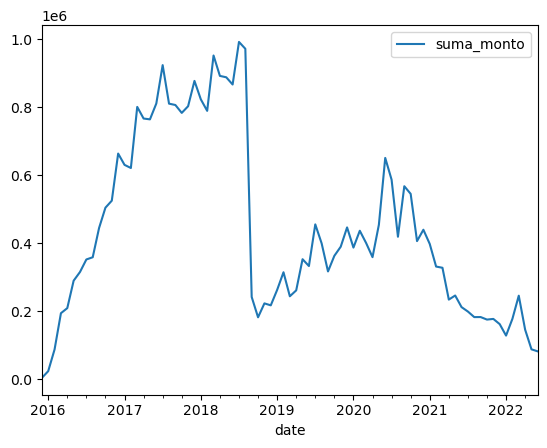

In [184]:
df_mensual[["suma_monto"]].plot()

## 26.lineplot con clientes únicos por año mes en otro gráfico


<AxesSubplot:xlabel='date'>

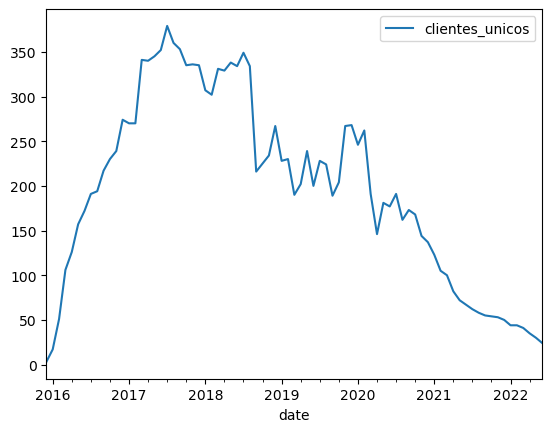

In [185]:
df_mensual[["clientes_unicos"]].plot()

## 27. Poner ambas líneas en dos gráficos alineados en la misma columna


In [186]:
#df_mensual.reset_index(inplace=True)

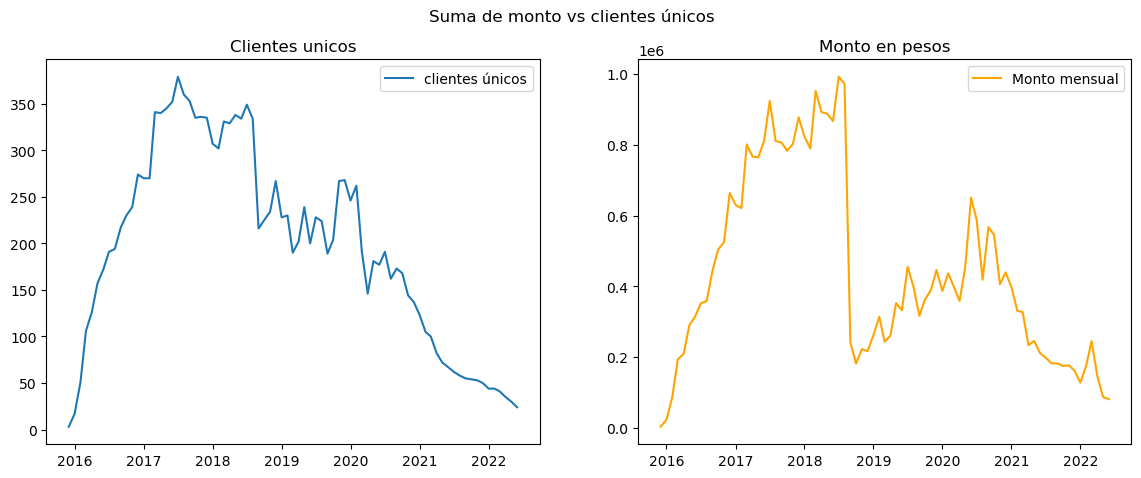

In [187]:
# Destructuring initialization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14,5)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(df_mensual["clientes_unicos"], label="clientes únicos")
axs[0].set_title('Clientes unicos')
axs[0].legend()
# Second subplot
axs[1].plot(df_mensual["suma_monto"], label="Monto mensual", c='orange')
axs[1].set_title("Monto en pesos")
axs[1].legend()
# Global figure methods
plt.suptitle('Suma de monto vs clientes únicos')
plt.show()

## 28. Haga otro gráfico que le parezca interesante. ¿Qué idea transmite con ese gráfico?


In [188]:
dolar_df_mensual

,media_venta
date,
2015-01-01,14.857500
2015-02-01,15.098000
2015-03-01,14.854000
2015-04-01,15.162500
2015-05-01,15.296667
...,...
2022-08-01,218.900000
2022-09-01,207.750000
2022-10-01,207.300000


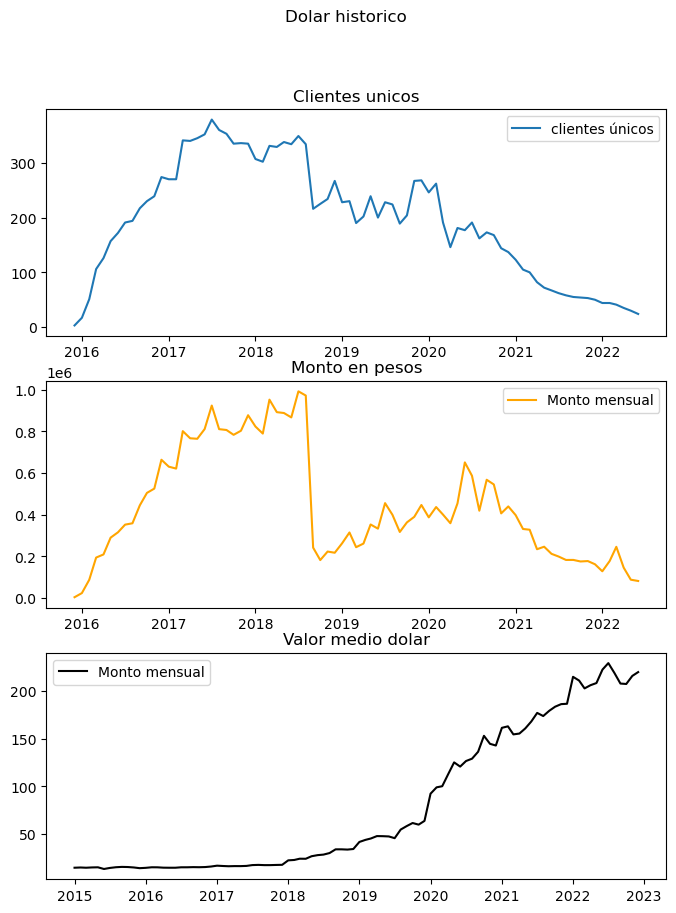

In [189]:
# Destructuring initialization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8,10)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(df_mensual["clientes_unicos"], label="clientes únicos")
axs[0].set_title('Clientes unicos')
axs[0].legend()
# Second subplot
axs[1].plot(df_mensual["suma_monto"], label="Monto mensual", c='orange')
axs[1].set_title("Monto en pesos")
axs[1].legend()
#third plot
axs[2].plot(dolar_df_mensual["media_venta"], label="Monto mensual", c='black')
axs[2].set_title("Valor medio dolar")
axs[2].legend()
# Global figure methods
plt.suptitle('Dolar historico')
plt.show()

Interpretacion en clase

In [190]:
df_mensual["monto_en_dolar"] =df_mensual["suma_monto"]/df_mensual["media_venta"]

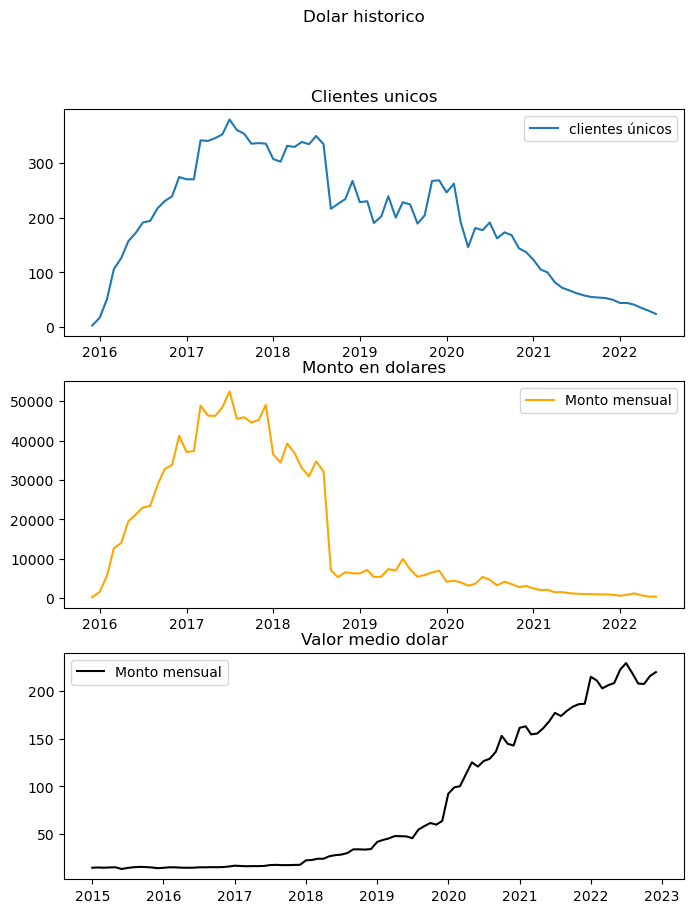

In [191]:
# Destructuring initialization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(8,10)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(df_mensual["clientes_unicos"], label="clientes únicos")
axs[0].set_title('Clientes unicos')
axs[0].legend()
# Second subplot
axs[1].plot(df_mensual["monto_en_dolar"], label="Monto mensual", c='orange')
axs[1].set_title("Monto en dolares")
axs[1].legend()
#third plot
axs[2].plot(dolar_df_mensual["media_venta"], label="Monto mensual", c='black')
axs[2].set_title("Valor medio dolar")
axs[2].legend()
# Global figure methods
plt.suptitle('Dolar historico')
plt.show()

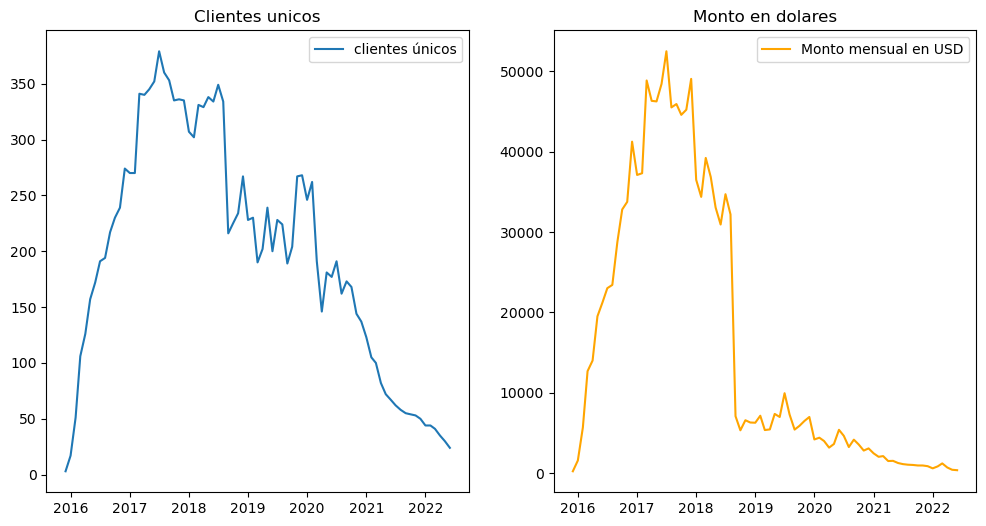

In [192]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12,6)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(df_mensual["clientes_unicos"], label="clientes únicos")
axs[0].set_title('Clientes unicos')
axs[0].legend()
# Second subplot
axs[1].plot(df_mensual["monto_en_dolar"], label="Monto mensual en USD", c='orange')
axs[1].set_title("Monto en dolares")
axs[1].legend()


In [193]:
!pwd

/Users/usuario/PycharmProjects/pythonProject5/UCEMA/06-examen/script



# Teoría (en menos de una carilla)
30.Teniendo en cuenta este dataset ¿Qué problema podrías resolver con Machine Learning?

Dado que es una empresa que cobra préstamos y a esa dinero lo vuelve a colocar. Poder predecir cuanto dinero voy a cobrar mes a mes me permitiría tener una proyección clara de los fondos que voy a disponer para distintas estrategias financieras. Saber tambien cuanto dinero voy a cobrar los siguientes meses podría permitirme entnder a cuanto tiempo colocar el dinero, si lo coloco a un plazo muy largo y empiezo a cobrar menos, tal vez me quede sin dinero, si lo hago a muy corto plazo estimando que voy a cobrar mucho dinero podría también estar tomando un mala decisión.

31. En caso de embarcarse en una tarea de Machine Learning. Describa el proceso CRISPDM y expliquelo para este caso.

El proceso CRISPDM tiene cómo etpas el entendimiento del negocio, el entendimiento de la data, la preparación o procesamiento, la evaluación y el deployment. En este caso habría que entender el valor económico de tener en claro que monto se va a cobrar para saber si justifica o no el modelo. Una vez entendido habría que buscar entender que columnas pueden favores a predecir cuanto se va a cobrar. ¿Los préstamos a cobrar están determinados por las condiciones macroeconómicas o también está determinado por cuantos préstamos se dieron los meses anteriores?. En caso de la preparación de la data en este caso habría que repetir eliminar los nulos y outliers. El modelo debería predecir una valor continuo, el monto a cobrar mensual. Para evaluarlo deberíamos hacer un back testing evaluando meses que conocemos sus resultados vs el valor del modelo. El deployment podría ser 1 vez al mes, no necesita ser real time.

32. ¿Qué decisión del negocio o tarea se podría automatizar o escalar? ¿Por qué?

Podría automatizar la decisión de transferir al broker la cantidad de dinero a utilizar en estrategias y los plazos. Por otro lado cómo también tengo la data a nivel cliente podría predecir cuál es la probabilidad que un cliente individual pague el mes siguiente. Es analogo a los recibos totales pero a nivle individual. Podría automatizar un mensaje al cliente días previos al vencimiento de la cuota o un sistema de ranking para priorizar a cobradores de la empresa. Tendrían que llamar primer oa los clientes con mayor probabilidad de no pagar o menor probabilidad de pagar.
